## Final Project Submission

Please fill out:
* Student name: Charlie Losche
* Student pace: full time
* Scheduled project review date/time: 8/1/2022
* Instructor name: David Elliot
* Blog post URL:N/A


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#import 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

# Exploratory Data Analysis (EDA)

Analyze and review the dataframe to better understand its makeup, the columns, datatypes, etc.

In [4]:
pd.set_option('display.max_colwidth', None) #allows us to see the full text of each object column, namely the "address" field
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188


In [5]:
#Confirm the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [6]:
#Look at the 'floors' value counts to determine why its a float
df['floors'].value_counts()

1.0    13962
2.0    12265
1.5     2439
3.0     1222
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

In [7]:
#Identify the number of NAs / Nulls (blank)
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [8]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [9]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [10]:
df['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)
df['sale_year'] = df['sale_year'].astype(np.int64)
print('sale years: \n', df.sale_year.value_counts())
print('build years: \n', df.yr_built.value_counts())
print('reno years: \n', df.yr_renovated.value_counts())

sale years: 
 2021    19293
2022    10862
Name: sale_year, dtype: int64
build years: 
 2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1935      39
1901      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64
reno years: 
 0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64


Based on the value counts above, the null values can either be kept as is or changed to "Unknown".

## Data Cleaning

### Linearity

In [11]:
df_num = df.select_dtypes(include=np.number)

df_num.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sale_year'],
      dtype='object')

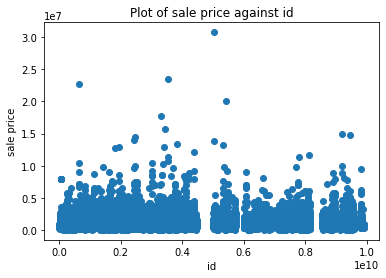

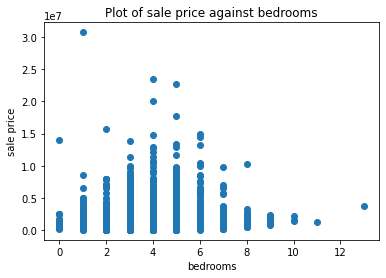

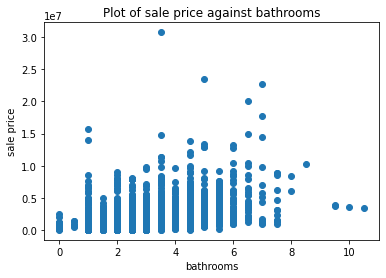

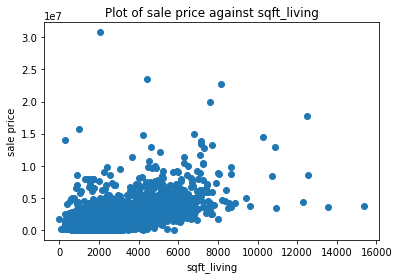

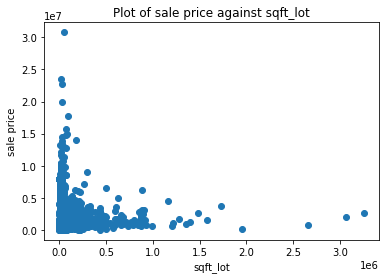

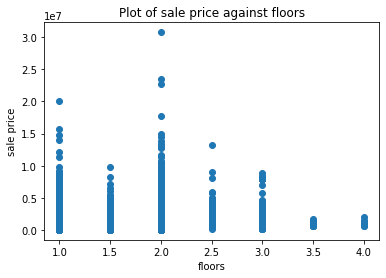

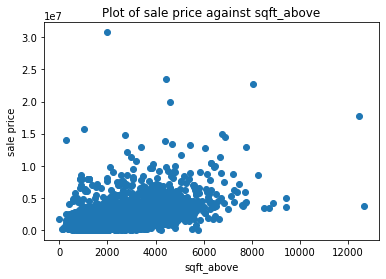

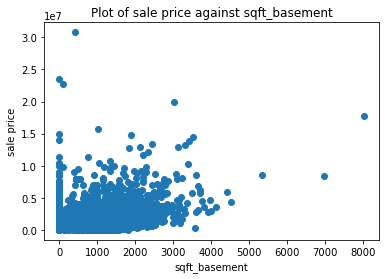

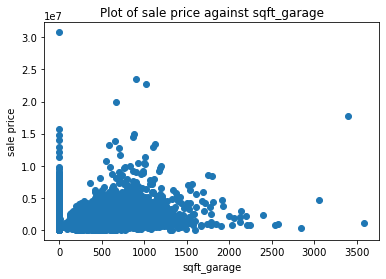

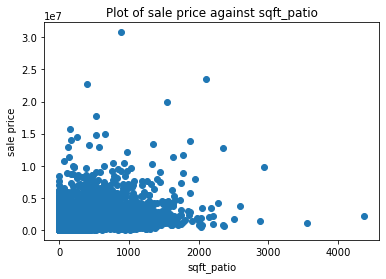

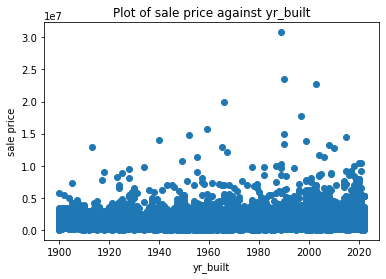

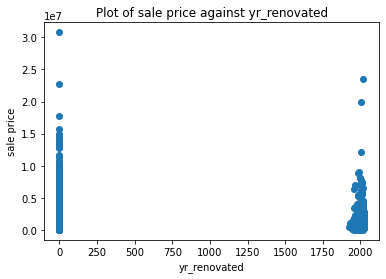

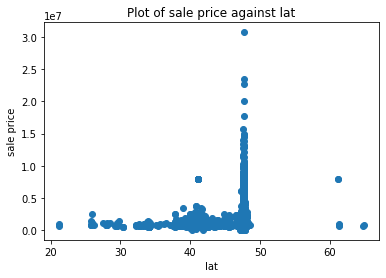

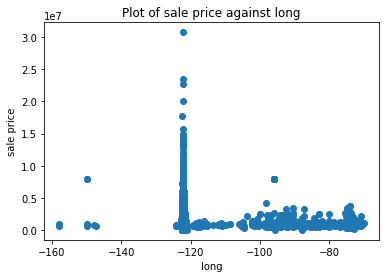

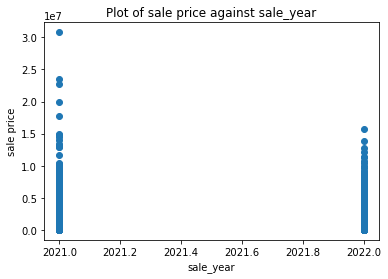

In [12]:
features = df_num.drop(columns='price').columns

for x in features:
    plt.scatter(df[x], df_num['price'])
    plt.title(f'Plot of sale price against {x}')
    plt.xlabel(x)
    plt.ylabel('sale price')
    plt.show()
    


# Nonlinear variables

Nonlinear variables include:
- sale year
- lat/long
- floors - categorical
- bathrooms - categorical
- bedrooms - categorical
- id

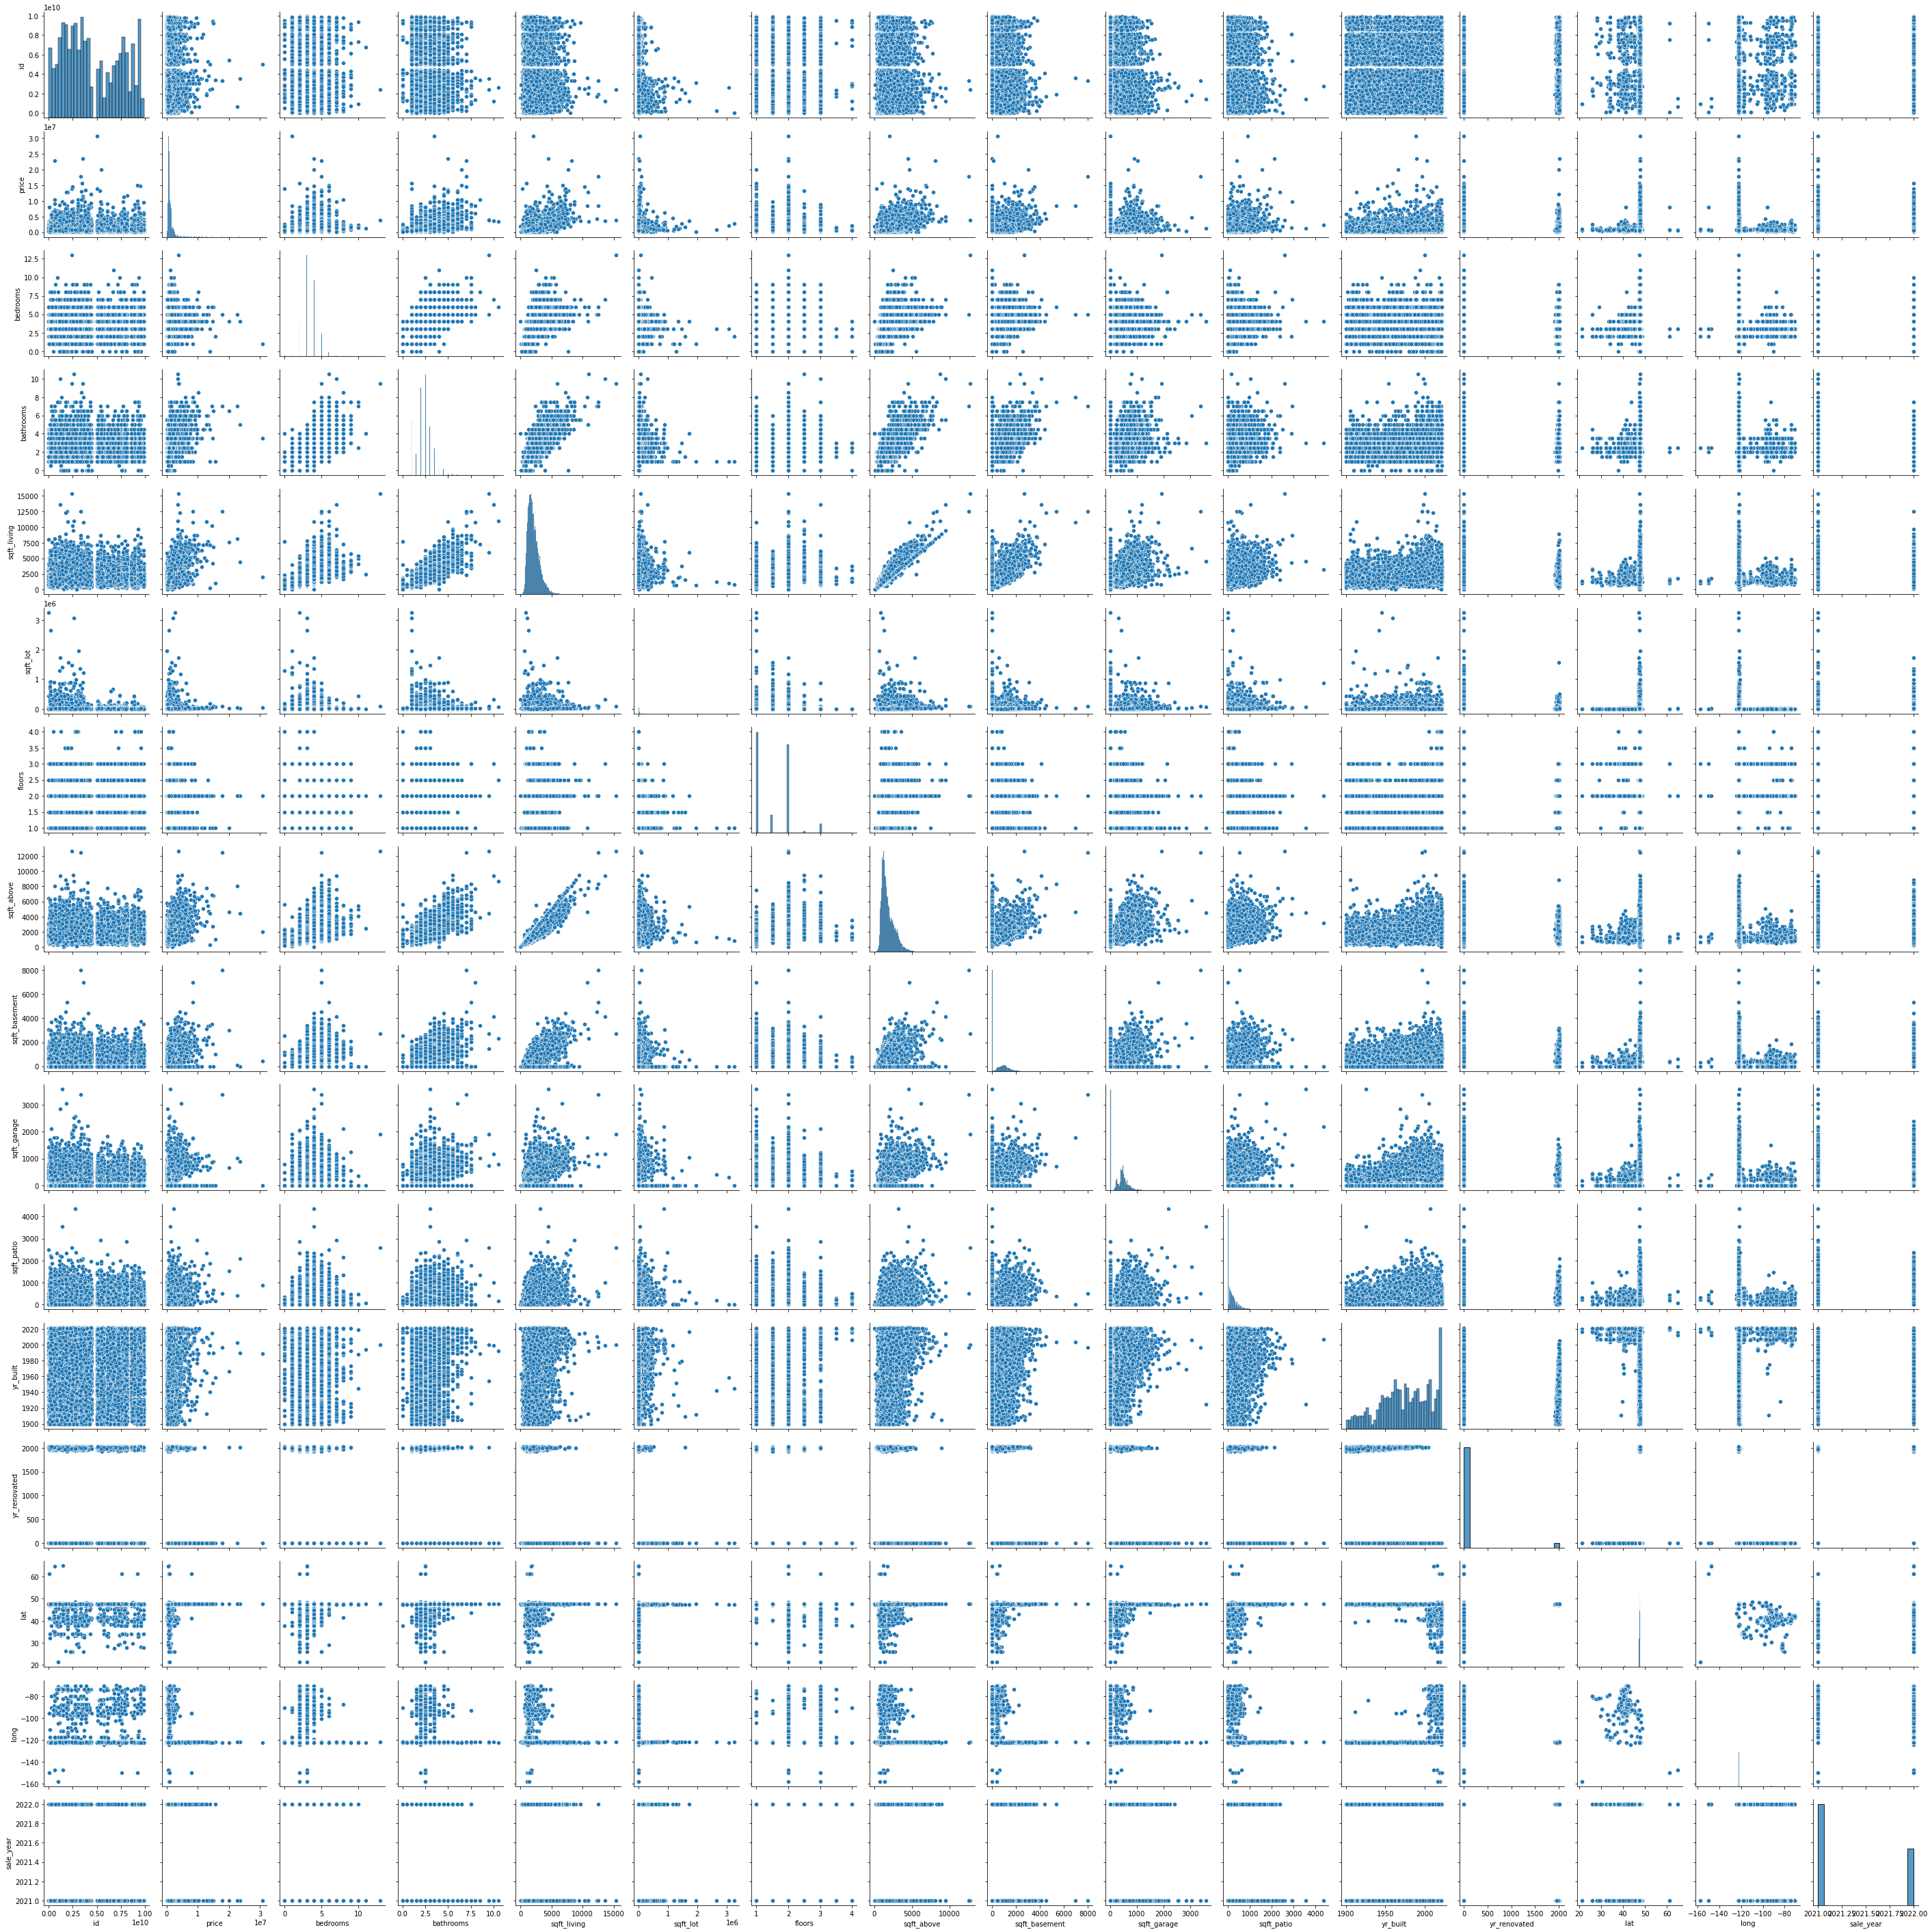

In [13]:
sns.pairplot(df)
plt.show()

## collinearity

In [14]:
df_predictors = df.drop(columns=['price'])

<AxesSubplot:>

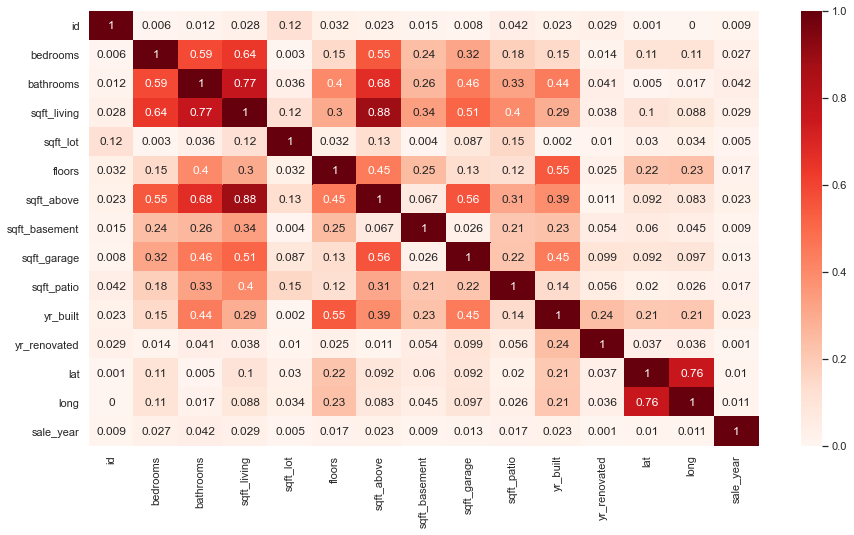

In [15]:
corr = round(abs(df_predictors.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)


It looks like there is high multicolinearity between:
- square footage against types of rooms and sqft of living
- sqft of different rooms against different types of rooms
- generally, anything inloving the space of the house/footage will have high colinearity

### VIF Scores/interpretations

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_num_pred = df_num.drop(columns='price')

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(df_num_pred.values, i) for i in range(len(df_num_pred.columns))]

# label the scores with their related columns
vif["features"] = df_num_pred.columns

vif

,VIF,features
0,3.539395,id
1,1.840332,bedrooms
2,3.284715,bathrooms
3,20.338576,sqft_living
4,1.068062,sqft_lot
5,2.011008,floors
6,17.228110,sqft_above
7,4.038710,sqft_basement
8,1.908084,sqft_garage
9,1.241089,sqft_patio


VIF Score Interpretation:

| Value | Correlation          |
|-------|----------------------|
| 1     | No correlation       |
| 1-5   | Moderate correlation |
| 5+    | High correlation     |

High (5+) correlation variables:

- sqf_living
- sqft_above
- sale_year

### Normality and Residuals

Quick Mutliple Regression to look at residuals

In [17]:
X = df_num_pred
y = df_num['price']

model = sm.OLS(y, sm.add_constant(X))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1474.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:20:49   Log-Likelihood:            -4.4780e+05
No. Observations:               30155   AIC:                         8.956e+05
Df Residuals:                   30139   BIC:                         8.958e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.373e+08   1.65e+07    -20.398      0.000    -3.7e+08   -3.05e+08
id            -2.833e-06   1.37e-06     -2.064      0.039   -5.52e-06   -1.43e-07
bedrooms      -1.663e+05   5419.852    -30.679      0.000   -1.77e+05   -1.56e+05
bathrooms      1.413e+05   7991.043     17.680      0.000    1.26e+05    1.57e+05
sqft_living     335.1074     18.157     18.456      0.000     299.519     370.696
sqft_lot         -0.0931      0.067     -1.387      0.165      -0.225       0.038
floors        -8512.1431   9796.213     -0.869      0.385   -2.77e+04    1.07e+04
sqft_above      289.0114     18.533     15.595      0.000     252.687     325.336
sqft_basement   163.3963     13.597     12.017      0.000     136.746     190.046
sqft_garage    -146.7386     18.958     -7.740      0.000    -183.897    -109.580
sqft_patio      265.1725     17.810     14.889      0.000     230.264     300.081
yr_built      -3203.5825    185.558    -17.265      0.000   -3567.285   -2839.880
yr_renovated     50.5110      9.943      5.080      0.000      31.023      69.999
lat            3.169e+04   4251.342      7.454      0.000    2.34e+04       4e+04
long           1.173e+04   1068.974     10.972      0.000    9633.350    1.38e+04
sale_year        1.7e+05   8177.745     20.787      0.000    1.54e+05    1.86e+05
==============================================================================
Omnibus:                    43623.487   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51640396.142
Skew:                           8.229   Prob(JB):                         0.00
Kurtosis:                     205.062   Cond. No.                     2.27e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
results.resid

0        308089.127914
1       -340268.280981
2       -687715.839841
3       -258853.936680
4         98024.434147
             ...      
30150    633970.782658
30151    278544.856685
30152     -5141.097736
30153   -576212.370911
30154    -47988.471348
Length: 30155, dtype: float64

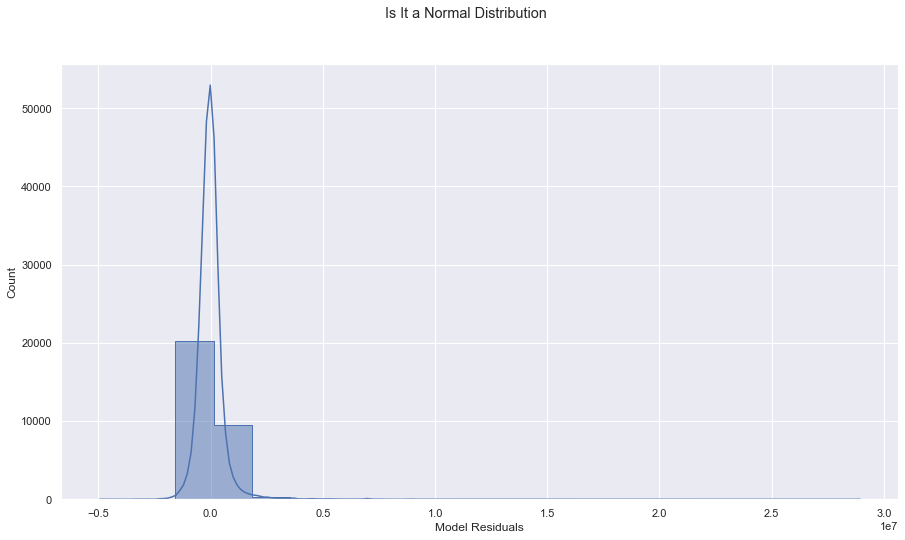

In [19]:
fig, ax = plt.subplots()
sns.histplot(results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is It a Normal Distribution");

### Perfect QQ vs Our Multiple Regression QQ Plot

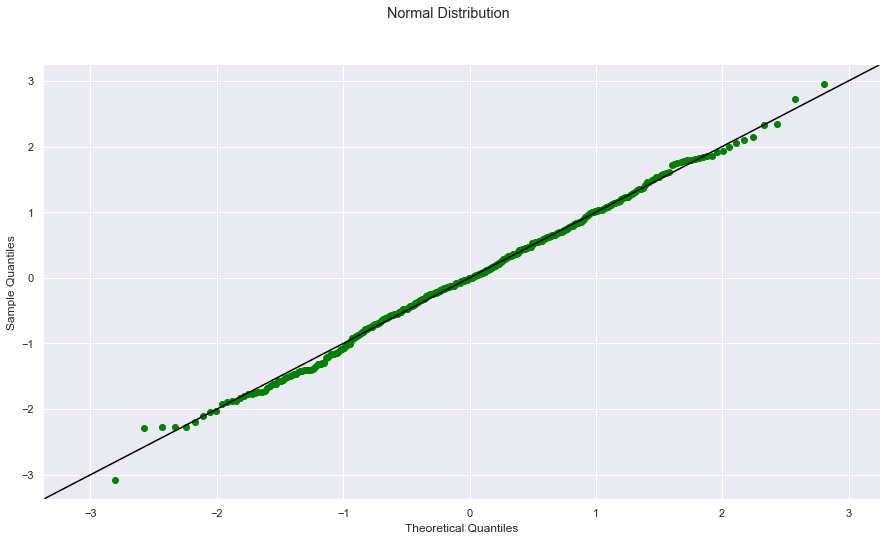

In [20]:
#Perfectly normal
generated_data = stats.norm.rvs(size=400, random_state=7)
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(generated_data, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

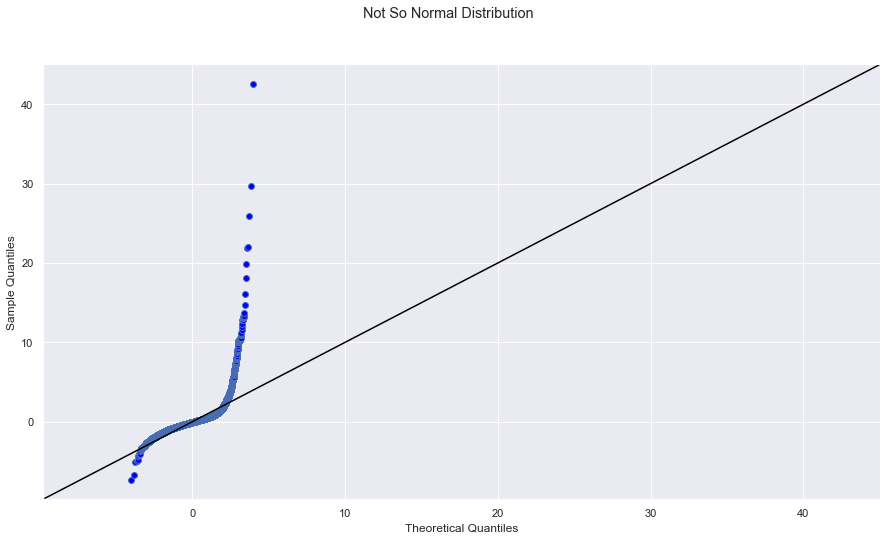

In [21]:
# Our distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

### Heteroskedasticity

In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [23]:
het_breuschpagan(results.resid, sm.add_constant(X))

(596.6722573730785,
 1.808234082214936e-117,
 40.55959078955443,
 1.0633992158463925e-118)

The Breusch-Pagan Test P value is  1.0633992213478174e-118 - so we reject the null that the dataset is homoskedastic - the data is heteroskedastic

In [24]:
results.params

const           -3.373134e+08
id              -2.832541e-06
bedrooms        -1.662758e+05
bathrooms        1.412846e+05
sqft_living      3.351074e+02
sqft_lot        -9.311288e-02
floors          -8.512143e+03
sqft_above       2.890114e+02
sqft_basement    1.633963e+02
sqft_garage     -1.467386e+02
sqft_patio       2.651725e+02
yr_built        -3.203583e+03
yr_renovated     5.051105e+01
lat              3.168948e+04
long             1.172858e+04
sale_year        1.699921e+05
dtype: float64

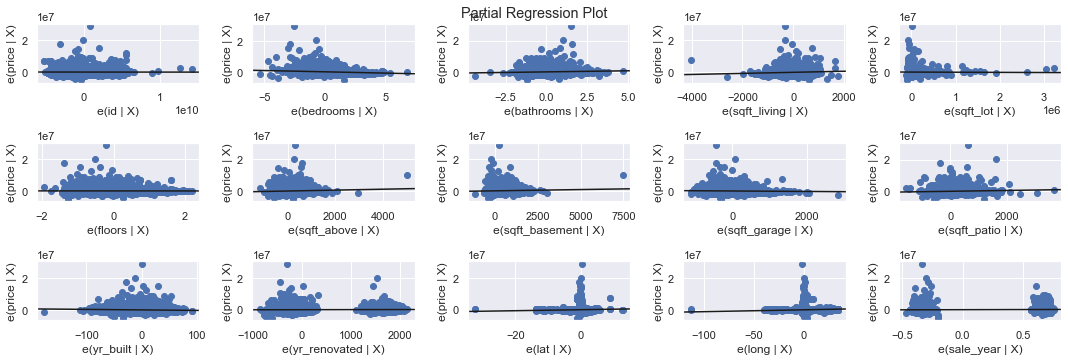

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns.values),
    grid=(5,5),
    fig=fig)
plt.show()

In [26]:
y_log = y.lo

AttributeError: 'Series' object has no attribute 'lo'

# Data Cleaning - variables 9-13

my variables to turn into categorical

-  `waterfront` - BINARY
* `greenbelt` - BINARY
* `nuisance` - BINARY
* `view` - ORDINAL
* `condition` - ORDINAL



In [ ]:
print(df.waterfront.value_counts(), ' \n')
print(df.greenbelt.value_counts(), ' \n')
print(df.nuisance.value_counts(), ' \n')
print(df.view.value_counts(), ' \n')
print(df.condition.value_counts(), ' \n')

binary variables first

In [ ]:
# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
greenbelt_cat = df[['greenbelt']]

# (2) Instantiate an OrdinalEncoder
encoder_greenbelt = OrdinalEncoder()

# (3) Fit the encoder on variable
encoder_greenbelt.fit(greenbelt_cat)

# Inspect the categories of the fitted encoder
encoder_greenbelt.categories_[0]

No Greenbelt: 0
Yes Greenbelt: 1

In [ ]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)

# Flatten for appropriate shape
greenbelt_encoded_train = greenbelt_encoded_train.flatten()

# Visually inspect variable
greenbelt_encoded_train

# (5) Replace value of greenbelt
df["greenbelt"] = greenbelt_encoded_train

# Visually inspect
df.head()

In [ ]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
nuisance_cat = df[['nuisance']]

# (2) Instantiate an OrdinalEncoder
encoder_nuisance = OrdinalEncoder()

# (3) Fit the encoder on variable
encoder_nuisance.fit(nuisance_cat)

# Inspect the categories of the fitted encoder
encoder_nuisance.categories_[0]


Nuisance NO: 0
Nuisance YES: 1

In [ ]:

# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)

# Flatten for appropriate shape
nuisance_encoded_train = nuisance_encoded_train.flatten()

# (5) Replace value of greenbelt
df["nuisance"] = nuisance_encoded_train

# Visually inspect
df.nuisance.value_counts()

Now for the ranked (ordinal) variables - view and condition

In [ ]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
condition_cat = df[['condition']]

#set the condition categories
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
# (2) Instantiate an OrdinalEncoder
encoder_condition = OrdinalEncoder(categories=[condition_categories])

# (3) Fit the encoder on variable
encoder_condition.fit(condition_cat)

# Inspect the categories of the fitted encoder
encoder_condition.categories_[0]

- 'Poor': 0
- 'Fair': 1
- 'Average': 2
- 'Good': 3
- 'Very Good': 4

In [ ]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
condition_encoded_train = encoder_condition.transform(condition_cat)

# Flatten for appropriate shape
condition_encoded_train = condition_encoded_train.flatten()

# (5) Replace value of greenbelt
df["condition"] = condition_encoded_train

# Visually inspect
df.condition.value_counts()

In [ ]:
df.view.value_counts()

In [ ]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
view_cat = df[['view']]

#set the condition categories
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
# (2) Instantiate an OrdinalEncoder
encoder_view = OrdinalEncoder(categories=[view_categories])

# (3) Fit the encoder on variable
encoder_view.fit(view_cat)

# Inspect the categories of the fitted encoder
encoder_view.categories_[0]

- 'NONE': 0
- 'FAIR': 1
- 'AVERAGE': 2
- 'GOOD': 3
- 'EXCELLENT': 4

In [ ]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
view_encoded_train = encoder_view.transform(view_cat)

# Flatten for appropriate shape
view_encoded_train = view_encoded_train.flatten()

# (5) Replace value of greenbelt
df["view"] = view_encoded_train

# Visually inspect
df.view.value_counts()

In [ ]:
df.head()

### Messing Around - weights of the variables

In [27]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

In [28]:
results_standardized = sm.OLS(y, sm.add_constant(X_standard)).fit()

In [29]:
weights = results_standardized.params
weights

const            1.108536e+06
id              -8.165048e+03
bedrooms        -1.632184e+05
bathrooms        1.256806e+05
sqft_living      3.264095e+05
sqft_lot        -5.622398e+03
floors          -4.832488e+03
sqft_above       2.538405e+05
sqft_basement    9.470959e+04
sqft_garage     -4.193358e+04
sqft_patio       6.504756e+04
yr_built        -1.027304e+05
yr_renovated     2.103649e+04
lat              4.544287e+04
long             6.715172e+04
sale_year        8.160777e+04
dtype: float64

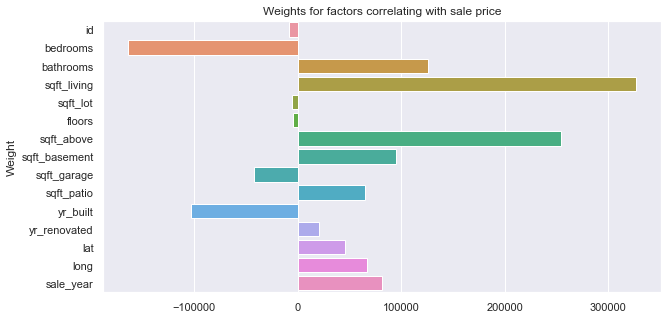

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with sale price")
plt.ylabel('Weight')
plt.show()

In [32]:
results_standardized.rsquared

0.42315156423625266

In [33]:
results.rsquared_adj

0.42286447022064433

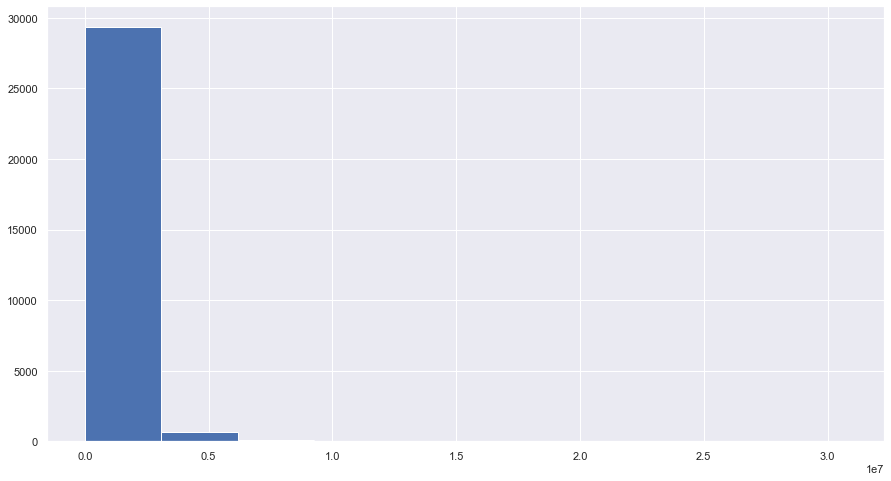

In [35]:
y.hist();

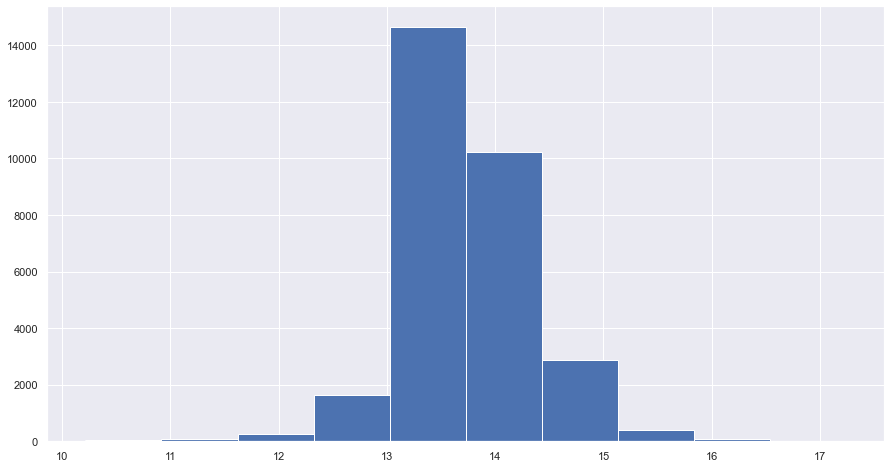

In [36]:
y_scld = np.log(y)
y_scld.hist();

In [37]:
model_diam = sm.OLS(y_scld, sm.add_constant(X_standard)).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:46   Log-Likelihood:                -17899.
No. Observations:               30155   AIC:                         3.583e+04
Df Residuals:                   30139   BIC:                         3.596e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7348      0.003   5443.046      0.000      13.730      13.740
id               -0.0012      0.003     -0.453      0.651      -0.006       0.004
bedrooms         -0.0582      0.003    -16.992      0.000      -0.065      -0.051
bathrooms         0.0922      0.005     20.148      0.000       0.083       0.101
sqft_living       0.2102      0.011     18.470      0.000       0.188       0.233
sqft_lot          0.0033      0.003      1.262      0.207      -0.002       0.008
floors            0.0488      0.004     13.643      0.000       0.042       0.056
sqft_above        0.1066      0.010     10.175      0.000       0.086       0.127
sqft_basement     0.0576      0.005     11.361      0.000       0.048       0.068
sqft_garage      -0.0034      0.003     -0.964      0.335      -0.010       0.003
sqft_patio        0.0375      0.003     13.354      0.000       0.032       0.043
yr_built         -0.0788      0.004    -20.579      0.000      -0.086      -0.071
yr_renovated      0.0092      0.003      3.436      0.001       0.004       0.014
lat               0.0520      0.004     13.263      0.000       0.044       0.060
long              0.0558      0.004     14.157      0.000       0.048       0.063
sale_year         0.0663      0.003     26.233      0.000       0.061       0.071
==============================================================================
Omnibus:                     7307.192   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71203.469
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                      10.316   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

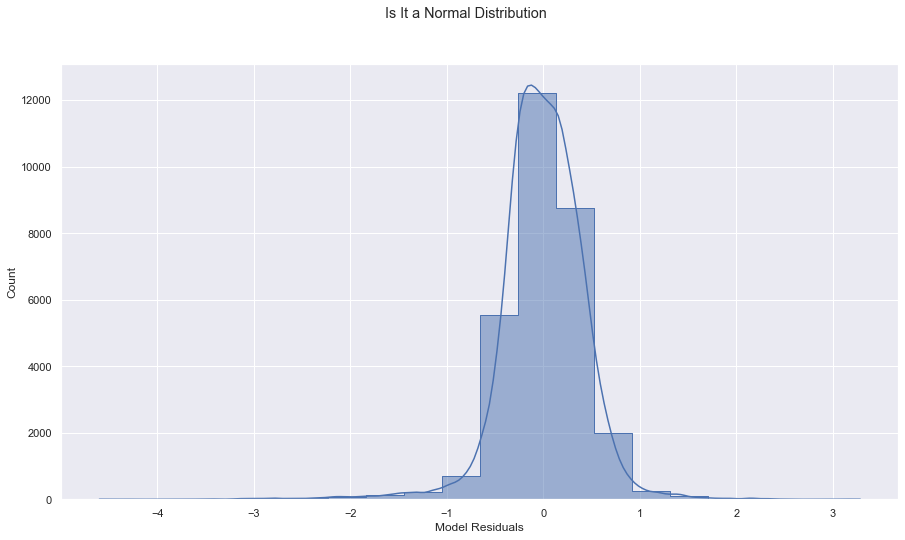

In [40]:
fig, ax = plt.subplots()
sns.histplot(model_diam.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is It a Normal Distribution");

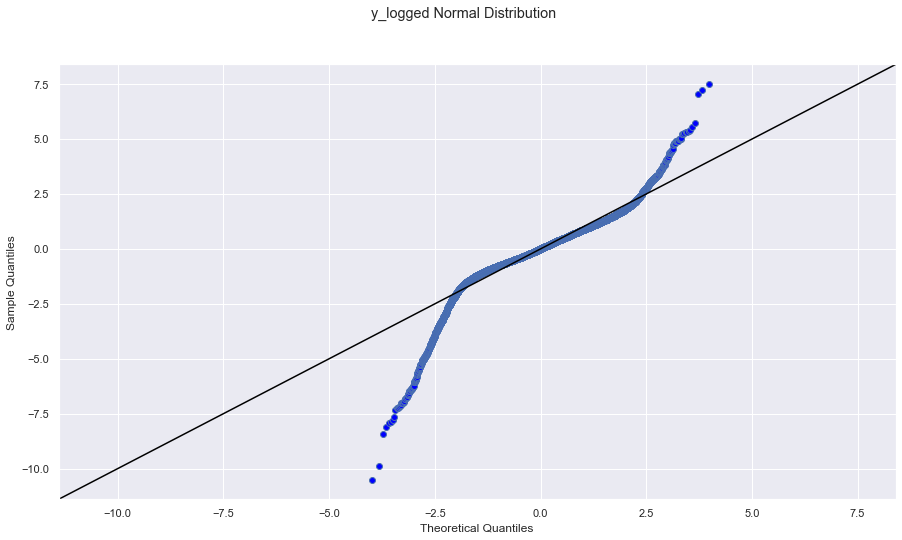

In [41]:
# Our distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(model_diam.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("y_logged Normal Distribution");

In [44]:
print(f"""
A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {round(np.exp(0.2102), 3)},
or {round(np.exp(0.0319) - 1, 3)}%.
""")


A one-unit increase in the depth variable corresponds
to an increase in price by a factor of 1.234,
or 0.032%.



In [45]:
het_breuschpagan(model_diam.resid, sm.add_constant(X_standard))

(447.2990355304889,
 7.639365971154634e-86,
 30.252864171430197,
 1.6084809645109793e-86)